In [1]:
%cd /work/vajira/DL/singan-polyp-aug

/work/vajira/DL/singan-polyp-aug


In [2]:
#%pwd

In [3]:
#%pip install /work/vajira/DL/singan-polyp-aug/dist/singan_polyp_aug-0.0.1-py3-none-any.whl

In [4]:
import singan_polyp_aug
import torch.nn as nn
import torch
import numpy as np
from singan_polyp_aug_temp.SinGAN import functions
from singan_polyp_aug_temp.SinGAN import manipulate
import argparse
from PIL import Image

/work/vajira/anaconda3/envs/pytorch-new/lib/python3.8/site-packages/singan_polyp_aug
/work/vajira/anaconda3/envs/pytorch-new/lib/python3.8/site-packages/sklearn/utils/fixes.py:25: UserWarning: Module singan_polyp_aug was already imported from /work/vajira/anaconda3/envs/pytorch-new/lib/python3.8/site-packages/singan_polyp_aug/__init__.py, but /work/vajira/DL/singan-polyp-aug is being added to sys.path
  from pkg_resources import parse_version  # type: ignore


In [5]:
#import torch
#import os
#import  SinGAN#singan_aug_polyps.SinGAN as SinGAN

In [17]:
parser = argparse.ArgumentParser()
parser.add_argument('--not_cuda', action='store_true', help='disables cuda', default=0)
parser.add_argument('--gen_start_scale', type=int, help='generation start scale', default=8)
parser.add_argument('--nc_z',type=int,help='noise # channels',default=4)
parser.add_argument('--nc_im',type=int,help='image # channels',default=4)
parser.add_argument('--ker_size',type=int,help='kernel size',default=3)
parser.add_argument('--num_layer',type=int,help='number of layers',default=5)
parser.add_argument('--scale_factor',type=float,help='pyramid scale factor',default=0.50)#pow(0.5,1/6)) #0.75
parser.add_argument('--mode', help='random_samples | random_samples_arbitrary_sizes', default='random_samples')
parser.add_argument('--out',help='output folder',default='/work/vajira/DATA/sinGAN_polyps/test_output')
parser.add_argument('--input_name', help='input image name', default="test_input_name")
opt = parser.parse_args("")
opt.device = torch.device("cpu" if opt.not_cuda else "cuda:0")

In [18]:
opt

Namespace(device=device(type='cuda', index=0), gen_start_scale=8, input_name='test_input_name', ker_size=3, mode='random_samples', nc_im=4, nc_z=4, not_cuda=0, num_layer=5, out='/work/vajira/DATA/sinGAN_polyps/test_output', scale_factor=0.5)

In [19]:
from singan_polyp_aug import load_from_dir

In [20]:
sample_dir = "/work/vajira/DL/sinGAN/SinGAN-aug/TrainedModels/cju2tvrvm53ws0801a0jfjdxg/scale_factor=0.750000,alpha=10"

In [21]:
Gs,Zs,reals,NoiseAmp = load_from_dir(sample_dir)

In [22]:
# new functions

In [23]:
in_s = functions.generate_in2coarsest(reals, 1, 1, opt)

In [24]:
in_s.shape

torch.Size([1, 4, 183, 195])

In [25]:
output = manipulate.SinGAN_generate(Gs, Zs, reals, NoiseAmp, opt, gen_start_scale=opt.gen_start_scale, num_samples=1)

In [26]:
img = Image.open("/work/vajira/DATA/sinGAN_polyps/test_output/RandomSamples/test_input_/gen_start_scale=6/0.png")

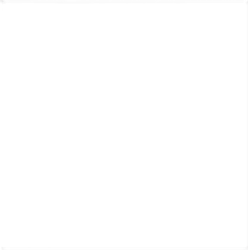

In [27]:
img

In [28]:
np_img = np.array(img)

In [29]:
np_img.shape

(250, 248, 4)

In [30]:
import matplotlib.pyplot as plt

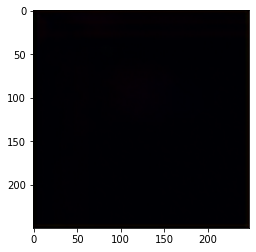

In [31]:
plt.imshow(np_img[:,:, 0:3])

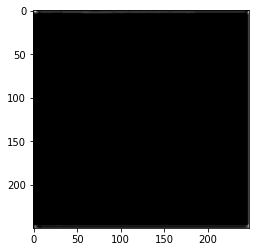

In [32]:
plt.imshow(np_img[:,:, 3],cmap="gray")